## Loading Iris Data

In [2]:
from sklearn import datasets 
import numpy as np 

iris = datasets.load_iris() 
X = iris.data[:,[2,3]] 
y = iris.target

In [3]:
print('Class labels:', np.unique(y)) 

Class labels: [0 1 2]


## Split the Datasets

In [4]:
# stratify 按照比例分层抽样

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state =1, stratify =y
)

In [5]:
print('Labels Counts in y:', np.bincount(y)) 
print('Labels counts in y_train', np.bincount(y_train)) 
print('Labels counts in y_tests:', np.bincount(y_test)) 

Labels Counts in y: [50 50 50]
Labels counts in y_train [35 35 35]
Labels counts in y_tests: [15 15 15]


## Preprocessing the data 

In [ ]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() 
sc.fit(X_train) # calculate mean and std from training set
X_train_std = sc.transform(X_train) 
X_test_std = sc.transform(X_test) # use the same transformation for test set

## Perceptron Model

In [7]:
from sklearn.linear_model import Perceptron 
ppn = Perceptron(eta0=0.1, random_state = 1) 
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [8]:
y_pred = ppn.predict(X_test_std) 
print('Misclassifed examples: %d' %(y_test!=y_pred).sum())

Misclassifed examples: 1


## Model Evaluation

In [9]:
from sklearn.metrics import accuracy_score 
print('Accurace:%.3f' %accuracy_score(y_test,y_pred))

Accurace:0.978


In [10]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


## Train a logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# c是正则化的倒数，数值越大，正则化越小
# solver是优化算法，lbfgs 用于中小数据的拟牛顿算法
# ovr：one over rest代表二分了类，可换成multinomial进行多分类
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [14]:
lr.predict_proba(X_test_std[:3, :])
print('Predicted class labels:', lr.predict_proba(X_test_std[:3, :])) 
print('Predicted class labels:', lr.predict_proba(X_test_std[:3, :]).argmax(axis=1))

Predicted class labels: [[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]
Predicted class labels: [2 0 0]


In [15]:
lr.predict(X_test_std)

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [16]:
lr.predict(X_test_std[0, :].reshape(1, -1)) 

array([2])

## Show the L2 regularization

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed

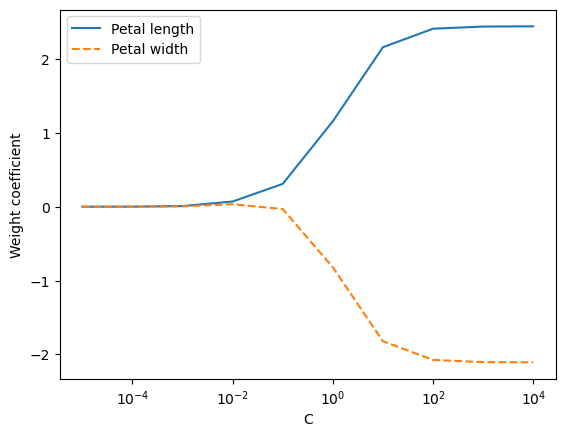

In [18]:
import matplotlib.pyplot as plt
weights, params = [], [] 
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)

plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()
